<a href="https://colab.research.google.com/github/mopahlevani/Numerical-Simulation/blob/main/Root%20Finding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Student 1 Name: Mohammad Hadi Pahlevani
- Student 2 Name: Spandan Bhattacharya

change the name of this notebook to  `name_1_name_2_notebook_??.ipynb` with *no spaces, no accents and no strange characters!* and where `??` stands for the number of the notebook you are working on.

# PPM Numerical Methods -- Numerical Methods for Physics

# Numerical methods: Root finding

# Root finding

## Bisection method

Use the bisection method to find the root of the function
    $$ f(x) = \frac{1}{2} - e^{-x}$$
think carefully how to estimate the error to end the calculation.

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [68]:
def f(x):
  return (1/2) - np.exp(-x)

tol = np.exp(-8)
max_steps = 100

In [69]:
start = timeit.default_timer()

step = 0
a = -1
b = 1

while (np.abs(f(a))>tol and (np.abs(f(b))>tol)):
  c = (a+b)/2
  step = step + 1
  if np.abs(f(c)) < tol :
    print("The Root is", c)
    break
  elif f(c)*f(a) < 0:
    b = c
  else:
    a = c
  if step >= max_steps:
        print("Step limit reached. Stopping without finding a precise root.")
        break

stop = timeit.default_timer()
print('Time: ', stop - start, 's,', 'Step:', step)
comparison_list = []
comparison_list.append(["Bisection", stop - start, step ])

The Root is 0.693359375
Time:  0.0011600939997151727 s, Step: 10


## False-position method

Use the false position method to find the root of the function
    $$ f(x) = \frac{1}{2} - e^{-x}$$
and compare to the bisection method

In [70]:
start = timeit.default_timer()

step = 0
max_steps = 100
l = -1
u = 1
r = 0

def f(x):
  return (1/2) - np.exp(-x)

while (np.abs(f(l))>tol and (np.abs(f(u))>tol)):
  r = u - (f(u) * (l-u))/(f(l)-f(u))
  step = step + 1
  if np.abs(f(r)) < tol :
    print("The Root is", r)
    break
  elif f(r)*f(l) < 0:
    u = r
  else:
    l = r
  if step >= max_steps:
        print("Step limit reached. Stopping without finding a precise root.")
        break

stop = timeit.default_timer()
print('Time: ', stop - start, 's,', 'Step:', step)
comparison_list.append(["False-position", stop - start, step ])

The Root is 0.6937810679861931
Time:  0.0007801430001563858 s, Step: 13


## The Newton-Raphson Method

Implement the Newton-Rapshon method to solve
$$ f(x) = \frac{1}{2} - e^{-x}$$
and compare to the bisection and false position methods

- Try different starting guess values, e.g. -1, 1, 5 and 30
- Comment

In [71]:
#The Newton-Raphson Method without Backtracking
start = timeit.default_timer()

step = 0
i = 1

def f(x):
  return (1/2) - np.exp(-x)

def diff(f, x):
    return (f(x + tol) - f(x - tol)) / (2 * tol)

for step in range(max_steps) :
  if f(i)*diff(f,i) > 0:
    d = -1 * diff(f,i)
  else:
    d = diff(f,i)
  j = i - ( f(i) / diff(f,i) )
  i = j
  step = step + 1
  if np.abs(f(i)) < tol :
    print("The Root is", i)
    break
  if step >= max_steps:
        print("Step limit reached. Stopping without finding a precise root.")
        break

stop = timeit.default_timer()
print('Time: ', stop - start, 'Step', step)
comparison_list.append(["Newton-Raphson", stop - start, step ])

The Root is 0.6931462784360416
Time:  0.0013765210005658446 Step 3


In [72]:
#The Newton-Raphson Method with Backtracking

start = timeit.default_timer()

step = 0
i = 1
alpha = 2
delta = 0
max_backtrack = 1000
max_steps = 1000

def f(x):
    return 0.5 - np.exp(-x)

def diff(f, x):
    return np.exp(-x)

for step in range(max_steps):
    f_i = f(i)
    f_prime_i = diff(f, i)

    delta = -f_i / f_prime_i
    new_guess = i + delta

    backtrack_step = 0
    while np.abs(f(new_guess)) > np.abs(f_i) and backtrack_step < max_backtrack:
        delta = delta / alpha
        new_guess = i + delta
        backtrack_step += 1

    i = new_guess
    step += 1

    if np.abs(f(i)) < tol:
        print("The Root is", i)
        break

    if step >= max_steps:
        print("Step limit reached. Stopping without finding a precise root.")
        break

stop = timeit.default_timer()
print('Time: ', stop - start, 'Step', step)
comparison_list.append(["Newton-Raphson with Backtracking", stop - start, step ])

The Root is 0.6931462784620456
Time:  0.0006865639998068218 Step 3


The Newton-Raphson method is highly sensitive to the initial guess, working well for values like
$$i=-1,1,5$$
but leading to overflow errors for flawed initial guesses, approximately $$i>7$$ due to the exponential nature of the function and floating-point precision issues. To address this, the Backtracking Technique is implemented, which adjusts the step size when necessary. This approach allows the method to converge even for poor initial guesses like
$$i=30$$ by preventing systematic errors, though minor precision warnings may still occur.

## The Secant Method

Implement the Newton-Rapshon method to solve
$$ f(x) = \frac{1}{2} - e^{-x}$$
and compare to the bisection and false position methods

- Try different starting guess values, e.g. -1, 1, 5 and 30
- Comment

In [73]:
start = timeit.default_timer()

step = 0
i = 1 #i-1
j = 3 #i
# k : i+1

def f(x):
  return (1/2) - np.exp(-x)

for step in range(max_steps) :
  df = f(j)-f(i) / (j-i)
  k = j - (f(j) * (i-j)) / (f(i)-f(j))
  if f(i)*diff(f,i) > 0:
    d = -1 * diff(f,i)
  else:
    d = diff(f,i)
  i = j
  j = k
  step = step + 1
  if np.abs(f(i)) < tol :
    print("The Root is", i)
    break
  if step >= max_steps:
        print("Step limit reached. Stopping without finding a precise root.")
        break

stop = timeit.default_timer()
print('Time: ', stop - start, 'Step', step)
comparison_list.append(["The Secant", stop - start, step ])

The Root is 0.693406296993749
Time:  0.0011791480001193122 Step 7


## The Modified Secant Method

Implement the modified secant method and compare it to the other methods.

In [74]:
start = timeit.default_timer()

delta = tol
step = 0
i = 1 #i-1
# j : i+1

def f(x):
  return (1/2) - np.exp(-x)

for step in range(max_steps) :
  df = f(j)-f(i) / (j-i)
  j = i - (delta*f(i))/(f(i+delta)-f(i))
  if f(i)*diff(f,i) > 0:
    d = -1 * diff(f,i)
  else:
    d = diff(f,i)
  i = j
  j = k
  step = step + 1
  if np.abs(f(i)) < tol :
    print("The Root is", i)
    break
  if step >= max_steps:
        print("Step limit reached. Stopping without finding a precise root.")
        break

stop = timeit.default_timer()
print('Time: ', stop - start, 'Step', step)
comparison_list.append(["The Modified Secant", stop - start, step ])

The Root is 0.693146510100599
Time:  0.005062049000116531 Step 3


# Comparison Between the Methods

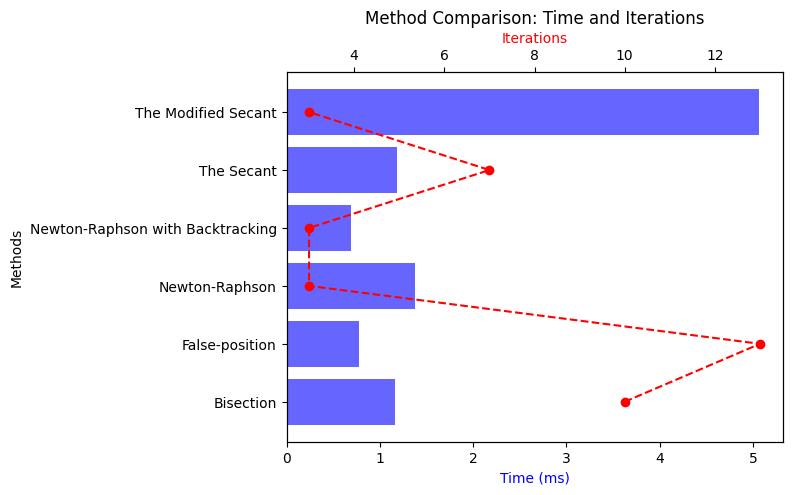

In [75]:
#Plotting Comparison

methods = [d[0] for d in comparison_list]
times = [d[1] * 1000 for d in comparison_list]
iterations = [d[2] for d in comparison_list]

fig, ax1 = plt.subplots()

ax1.barh(methods, times, color='b', alpha=0.6)
ax1.set_xlabel('Time (ms)', color='b')
ax1.set_ylabel('Methods')

ax2 = ax1.twiny()
ax2.plot(iterations, methods, color='r', marker='o', linestyle='--')
ax2.set_xlabel('Iterations', color='r')

plt.title('Method Comparison: Time and Iterations')
plt.show()

The performance of various root-finding methods in terms of time and iterations is visualized. As illustrated by the plot, the modified secant method generally requires fewer iterations but takes more time, while bisection is slower but more reliable. Newton-Raphson and false-position methods strike a balance between speed and iterations.

Note: These bars show the results of tests done with the fixed initial value $$i=1$$, as priorly explained, the Newton-Raphson Method has shortcomings for flawed inital guesses and it is fixed only via the Backtracking Technique.